<a id='top'></a>

# CSCI3022 F21
# Homework 1: Measures of Centrality and Dispersion
***

**Name**: Olivia Golden

***

This assignment is due on Canvas by **MIDNIGHT on Tuesday, September 7**. (NB: most HW will be due on Mondays, but due to Labor Day this is one day later).  Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statistics as stats
%matplotlib inline

[Back to top](#top)
<a/ id='p1'></a>

## (10 pts) Problem 1:Theory (The Minimal Median)
***

One way we conceptualize many data science questions is asking for the "best choice" of some parameter on data set.  We should be able to justify that our measures of centrality should in some way be the "best" ways to represent the data.


In lecture, we may have discussed the following important property of the mean:


The *sample mean* of data $X_1, X_2, \dots X_n$ is the unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n \left(X_i-c \right)^2. $$

The proof of that claim is as follows:

**Proof:**

Differentiating yields
$$f'(c)=\frac{df}{dc}\sum_{i=1}^n \left(X_i-c \right)^2 =\sum_{i=1}^n-2(X_i-c).$$ 

Setting $f'(c)=0$ gives

$$0=\sum_{i=1}^n-2(X_i-c)$$
$$=2nc-2\sum_{i=1}^n X_i$$
$$\implies\qquad  c=\frac{\sum_{i=1}^n X_i}{n}=\bar{X}$$

***

### Your exercise:

You are tasked with recreating a *similar* proof.  Prove the following:

The *median* of data $X_1, X_2, \dots X_n$ is the possibly non-unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n |X_i-c| $$

A few things to think about and **include in your solution**:

 - how do we differentiate the absolute value function?
 - what conditions might make the median non-unique in this case?  If it's nonunique, what possible values of $c$ still minimize the function $f$?  This about both how this process looks with different numbers of total points $n$ and if data values are possible identical/repeated.

**Proof:**

$$\sum_{i=1}^n \left|X_i-c \right|$$ can be rewritten as $$\sum_{i=1}^{j-1} \left(c-X_i \right) + \sum_{i=j}^n \left(X_i-c \right)$$ where $$X(j-1) \leq c \leq X(j)$$

Differentiating yields
$$f'(c)=\frac{df}{dc}(\sum_{i=1}^{j-1} \left(c-X_i \right) + \sum_{i=j}^n \left(X_i-c \right))=\sum_{i=1}^{j-1} -1 + \sum_{i=j}^n 1.$$ 

Setting $f'(c)=0$ gives

$$0=-(j-1)+(n+1-j)=-j+1+n+1-j=-2j+2+n$$
$$j=\frac{n+1}{2}$$
$$\implies X(\frac{n-1}{2}) \leq c \leq X(\frac{n+1}{2})$$

If n is even, then the median is not a number that is part of the data set and is on the interval above (non-unique). If $$X(\frac{n-1}{2})$$ and $$ X(\frac{n+1}{2})$$ are identical values, even if n is even, then the median is unique.
***


[Back to top](#top)
<a/ id='p2'></a>

## (15 pts) Problem 2: Theory and Computation (Scaling)
***
Consider the following 3 data sets:

`A=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]`

`B=[112,0,0,12,7,18,0,25,0,13,0,35]`

`C` is the random data set generated by using `np.random.gamma(5,1.5,size=37)`

For each data set, perform the following operations:

**Part A:** Compute and print the mean and standard deviation of the data set.

In [2]:
A=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
B=[112,0,0,12,7,18,0,25,0,13,0,35]
C=np.random.gamma(5,1.5,size=37)

#calculate mean by summing up set and divinding by length
print("Mean")
meanA=sum(A)/len(A)
meanB=sum(B)/len(B)
meanC=sum(C)/len(C)
print(meanA)
print(meanB)
print(meanC)
print("")
print("SD")
#set StdDev sum equal to 0
SDA=0
SDB=0
SDC=0
#for each value in the set, subtract the mean, square it, then divide by len of set minus 1
for i in range(len(A)):
    SDA=SDA+(A[i]-meanA)**2/(len(A)-1)
for i in range(len(B)):
    SDB=SDB+(B[i]-meanB)**2/(len(B)-1)
for i in range(len(C)):
    SDC=SDC+(C[i]-meanC)**2/(len(C)-1)
#take squareroot of StdDev sum to find StdDev
print(SDA**(1/2))
print(SDB**(1/2))
print(SDC**(1/2))


Mean
7.5
18.5
8.291556591724332

SD
4.760952285695233
31.583942986040466
4.775595610448281


**Part B:** Plot frequency histograms of each data set, with the 3 plots stacked vertically (one on top of the other).

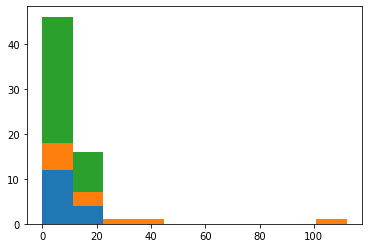

In [3]:
#create stacked histogram 
plt.hist([A,B,C], stacked=True)
plt.show()

**Part C:** Form 3 new data sets, $A^*$, $B^*$, and $C^*$.  Create each by subtracting the original means of A, B, and C from each observation in that data set. Compute and print the means and standard deviations of the new data sets.

In [4]:
#create new sets with length of previous sets
A2=[0]*len(A)
B2=[0]*len(B)
C2=[0]*len(C)
#for each value in set, subtract mean
for i in range(len(A)):
    A2[i]=A[i]-meanA
for i in range(len(B)):
    B2[i]=B[i]-meanB
for i in range(len(C)):
    C2[i]=C[i]-meanC
#calculate mean like above
print("Mean")
meanA2=sum(A2)/len(A2)
meanB2=sum(B2)/len(B2)
meanC2=sum(C2)/len(C2)
print(meanA2)
print(meanB2)
print(meanC2)
print("")
print("SD")
#calculate StdDev like above
SDA2=0
SDB2=0
SDC2=0
for i in range(len(A2)):
    SDA2=SDA2+(A2[i]-meanA2)**2/(len(A2)-1)
for i in range(len(B2)):
    SDB2=SDB2+(B2[i]-meanB2)**2/(len(B2)-1)
for i in range(len(C2)):
    SDC2=SDC2+(C2[i]-meanC2)**2/(len(C2)-1)
print(SDA2**(1/2))
print(SDB2**(1/2))
print(SDC2**(1/2))

Mean
0.0
0.0
-6.481301981595508e-16

SD
4.760952285695233
31.583942986040466
4.775595610448281


**Part D:** Form 3 new data sets, $\tilde{A}$, $\tilde{B}$, and $\tilde{C}$.  Create each by subtracting the original means of A, B, and C from each observation in that data set and then dividing by the original standard deviation.  Compute and print the means and standard deviations of the new data sets.

In [5]:
#create new sets of length of previous set
A3=[0]*len(A)
B3=[0]*len(B)
C3=[0]*len(C)
for i in range(len(A)):
    A3[i]=(A[i]-meanA)/SDA
for i in range(len(B)):
    B3[i]=(B[i]-meanB)/SDB
for i in range(len(C)):
    C3[i]=(C[i]-meanC)/SDC
#calculate mean like above   
print("Mean")
meanA3=sum(A3)/len(A3)
meanB3=sum(B3)/len(B3)
meanC3=sum(C3)/len(C3)
print(meanA3)
print(meanB3)
print(meanC3)
print("")
print("SD")
#calculate StdDev like above
SDA3=0
SDB3=0
SDC3=0
for i in range(len(A3)):
    SDA3=SDA3+(A3[i]-meanA3)**2/(len(A3)-1)
for i in range(len(B3)):
    SDB3=SDB3+(B3[i]-meanB3)**2/(len(B3)-1)
for i in range(len(C3)):
    SDC3=SDC3+(C3[i]-meanC3)**2/(len(C3)-1)
print(SDA3**(1/2))
print(SDB3**(1/2))
print(SDC3**(1/2))

Mean
-1.0408340855860843e-17
-5.782411586589357e-19
-2.850572630794321e-17

SD
0.21004201260420152
0.03166165796468104
0.209397964478431


**Part E:** Plot density histograms of each $\tilde{A}$, $\tilde{B}$, and $\tilde{C}$, with the 3 plots stacked vertically (one on top of the other).  Ensure that each plot has the same horizontal axis.  

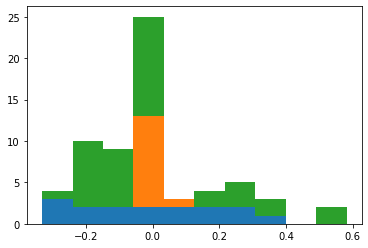

In [6]:
#create stacked histogram with new sets
plt.hist([A3,B3,C3], stacked=True)
plt.show()

**Part F:** Why might the result in part D matter?

The results of part D are the standardized data.


**Part G:** Looking at each of the 3 original data sets, come up with a real-world context where those numbers might make for reasonable observations.

Set A could represent someone's age over the course of 15 years. 

Set B could represent the number of pushups an individual does in a day.

Set C could represent the distance away a runner is from a point when running to a point and back.


[Back to top](#top)
<a/ id='p3'></a>

## (20 pts) Problem 3: Practice (Titanic)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [7]:
filepath = 'titanic_data.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**:
Based on the overall population of passengers, report the proportion that survived.

$$P(Survived=1)$$

In [8]:
#sum from dataframe where Survived is true (equal to 1)
people_survived = df["Survived"].sum()
#get total number of passengers
passengers=df.shape[0]
print(people_survived/passengers)

0.39281705948372614


**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

If the class warfare occured during the final hours aboard the Titanic, the survivial rate in first-class should be high and the surivival rate in the lower classes should be low.  If male chivarly was widespread during the final hours instead, then the survivial rate of women and children would be much higher than the survival rate of men. 

The two events are not mutually exclusive. Even though the chivalry is widespread, it is reasonable to assume that higher classes show more chivalry than lower classes.


**Part C**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [9]:
#create new dataframe from old dataframe where Survived, Pclass, Age, and Sex are not NULL
dfTitanic=df.dropna(subset=['Survived', 'Pclass', 'Age', 'Sex'])
#display information of new data set
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     713 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


**Part D**: Compute the probability of survival of both men and women.  Then, compute the probability of survival of passengers in each of the 3 passenger classes.  Finally, compute the probabilities of survival and men and women *within* each passenger class (all 6 subsets).  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


In [10]:
#access data of males
males = df.loc[df["Sex"]=='male']
print("Probability of surivial in men:")
#sum up survived from males and divide by total males
print((males["Survived"].sum())/males.shape[0])
#repeat for females
females = df.loc[df["Sex"]=='female']
print("Probability of surivial in women:")
print((females["Survived"].sum())/females.shape[0])
###
#repeat for 1st class passengeres
first_class = df.loc[df["Pclass"]==1]
print("Probability of surivial in 1st class:")
print((first_class["Survived"].sum())/first_class.shape[0])
#repeat for 2nd class passengers
second_class = df.loc[df["Pclass"]==2]
print("Probability of surivial in 2nd class:")
print((second_class["Survived"].sum())/second_class.shape[0])
#repreat for 3rd class passenegers
third_class = df.loc[df["Pclass"]==3]
print("Probability of surivial in 3rd class:")
print((third_class["Survived"].sum())/third_class.shape[0])
###
#access data of males in 1st class
first_class_male=df.loc[(df["Sex"] == 'male') & (df["Pclass"] == 1)]
print("Probability of surivial in 1st class as a male:")
#sum up survived for males in first class and divide by total number
print((first_class_male['Survived'].sum())/first_class_male.shape[0])
#repreat for males in 2nd class
second_class_male=df.loc[(df["Sex"] == 'male') & (df["Pclass"] == 2)]
print("Probability of surivial in 2nd class as a male:")
print((second_class_male['Survived'].sum())/second_class_male.shape[0])
#repeat for males in 3rd class
third_class_male=df.loc[(df["Sex"] == 'male') & (df["Pclass"] == 3)]
print("Probability of surivial in 3rd class as a male:")
print((third_class_male['Survived'].sum())/third_class_male.shape[0])
###
#repeat for females in 1st class
first_class_female=df.loc[(df["Sex"] == 'female') & (df["Pclass"] == 1)]
print("Probability of surivial in 1st class as a female:")
print((first_class_female['Survived'].sum())/first_class_female.shape[0])
#repeat for females in 2nd class
second_class_female=df.loc[(df["Sex"] == 'female') & (df["Pclass"] == 2)]
print("Probability of surivial in 2nd class as a female:")
print((second_class_female['Survived'].sum())/second_class_female.shape[0])
#repeat for females in 3rd class
third_class_female=df.loc[(df["Sex"] == 'female') & (df["Pclass"] == 3)]
print("Probability of surivial in 3rd class as a female:")
print((third_class_female['Survived'].sum())/third_class_female.shape[0])


Probability of surivial in men:
0.1975736568457539
Probability of surivial in women:
0.7515923566878981
Probability of surivial in 1st class:
0.6342592592592593
Probability of surivial in 2nd class:
0.4891304347826087
Probability of surivial in 3rd class:
0.2505091649694501
Probability of surivial in 1st class as a male:
0.3770491803278688
Probability of surivial in 2nd class as a male:
0.17592592592592593
Probability of surivial in 3rd class as a male:
0.14121037463976946
Probability of surivial in 1st class as a female:
0.9680851063829787
Probability of surivial in 2nd class as a female:
0.9342105263157895
Probability of surivial in 3rd class as a female:
0.5138888888888888


i) The closest result to part A is the probability of surivial in males in 1st class.  There are a few probabilities that are very high compared to Part A like the probiablity of surving as a female in both first and second class.  There are also a few that are much lower than part A like the probaiblity of survival as a male in 2nd and 3rd class.

ii) Females have a much higher probability of survivial than the base survival results, and males have a much lower probability. 

iii) In every class, females were more likely to survive. 

iv) Women in third class were more likely to survive than males in first class. 

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the *same set* of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not.  This means that the two axes should overlap. 
* Use the bin edges $[0,4,8,\ldots,72,76,80]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with `darkgreen` and the passed with `red`.
* As you plot both histograms on a single set of axes you should use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible and their overlap becomes a blend of the two colors.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

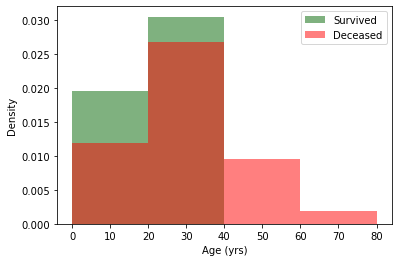

In [11]:
#access those that survived titanic from new dataframe
age1=dfTitanic.loc[dfTitanic['Survived']]
#access age 
age_survived=age1.Age
#plot on histogram with some transparancy
plt.hist(age_survived, 4, [0, 80], 'density', color='darkgreen', label='Survived', alpha = 0.5)
#access those that did not survive titanic from new dataframe
age2=dfTitanic.loc[dfTitanic['Survived']==0]
#access age
age_not_survived=age2.Age
#plot on histogram with some transparancy
plt.hist(age_not_survived, 4, [0, 80], 'density', color='red', label="Deceased", alpha = 0.5)
plt.xlabel('Age (yrs)')
plt.ylabel('Density')
plt.legend()
plt.show()


No one above 40 survived, and even though deceased passengers under 20 had a lower density, those survived passengers between 20 and 40 had a higher density.  One possible explination for this is that children were put first on life boats.  It is also possible that those above 40 had a harder time moving/reacting quickly, lowering their chances of survival.

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

A density diagram is a better choice since it analyzes the porportion, not the count. We can assume that fewer 80 year olds were on the Titanic than other ages, so a frequency graph would make it hard to accuratley compare the seperate groups.


**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

The data suggests a combination of class warfare, male chivalry, and age bias.  No one over 40 survived, the rate for survival of men was significantly lower than women, and the higher classes had a much higher chance of survivial than the lower classes.


**Part H**: In lecture we described some types of sampling from a *sample frame*.  Perform the following operations:

1) Since the overall ship had around 65% men, create a *sample* of distinct passengers from the overall ship that consists of exactly 13 randomly chosen men and 7 randomly chosen women.  Report the proportion of those passengers that survived.

2) Repeat the sampling process from part 1) 1000 times.  Report the **mean** survival proportion of those 1000 samples.  Is this close to the survival rate in part A?  Why or why not?

3) Make a histogram of the 1000 sample means from parth H2.  Include an indicator of the mean your computed in H2 on the histogram.

4) What is the name for this sort of sample?


Male survival
0.15384615384615385
Female survival
0.7142857142857143
Mean
0.47601648351648457


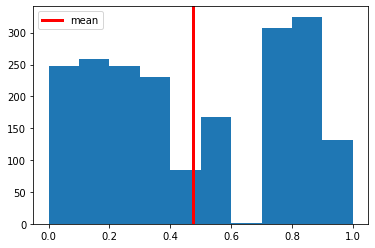

In [12]:
#get sample from previous 'males' of size 13
male_sample=males.sample(n=13)
print("Male survival")
#compute porportion
print((male_sample["Survived"].sum())/male_sample.shape[0])
#get sample from previous 'females' of size 7
female_sample=females.sample(n=7)
print("Female survival")
#compute probaility
print((female_sample["Survived"].sum())/female_sample.shape[0])

#create sample array
sample=[]
#repeat above 1000 times
for i in range(1000):
    male_sample=males.sample(n=13)
    sample.append(male_sample["Survived"].sum()/male_sample.shape[0])
    female_sample=females.sample(n=7)
    sample.append((female_sample["Survived"].sum())/female_sample.shape[0])
    
print("Mean")
#compute mean
mean_sample=sum(sample)/len(sample)
print(mean_sample)
plt.hist(sample)
#add indicator of mean
plt.axvline(x=mean_sample, linewidth=3.0, color='red', label='mean')
plt.legend()
plt.show()

2) The mean is about 8% off of the mean from part A.  I think this is because some of the randomly selected data could have been repeated, given different results.  

3) This sample is called a stratified sample, since the data is seperated into homogenous groups and then porportioned based on the prevelance. 
